### Importing the libraries

In [ ]:
import os
import pandas as pd
import  numpy as np
from skimage import io, transform
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import cv2
import imghdr
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy
from tensorflow.keras.models import load_model

### Data preparation

**Remove dodgy images**:


this step for ensuring data quality, model performance, and efficiency in machine learning tasks. It promotes reliable and accurate analysis while minimizing the risk of errors or inconsistencies caused by unreliable data.







In [ ]:
data_dir='/kaggle/input/datasettaskmariam/dataset/data'

In [ ]:
image_exts=['jpeg','jpg', 'bmp', 'png']

In [ ]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [ ]:
data = tf.keras.utils.image_dataset_from_directory('/kaggle/input/datasettaskmariam/dataset/data')

Found 252 files belonging to 5 classes.


In [ ]:
data_iterator = data.as_numpy_iterator()

In [ ]:
batch = data_iterator.next()

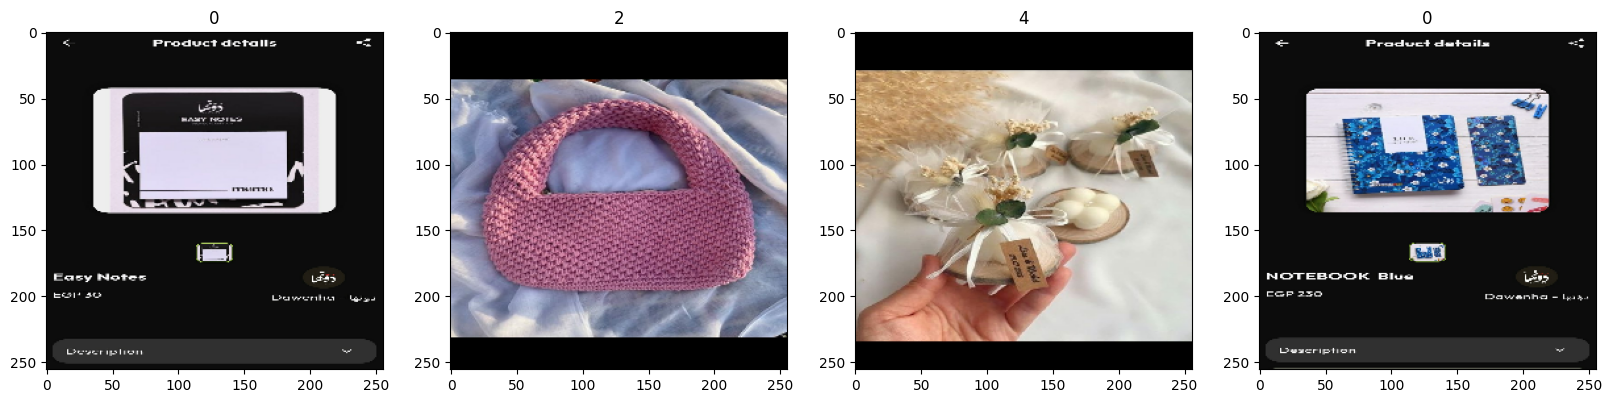

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

**scaling the data**

In [ ]:
data = data.map(lambda x,y: (x/255, y))

In [ ]:
data.as_numpy_iterator().next()

(array([[[[0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         [[0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         [[0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         ...,
 
         [[0.        , 0.        , 0.        ],
          [0.     

### Splitting the data

In [ ]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [ ]:
train_size

5

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

### Building the model  

In [ ]:
model = Sequential()

# Convolutional layers
model.add(Conv2D(16, (3, 3), 1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())

# Flatten layer
model.add(Flatten())

# Fully connected layers
model.add(Dense(256, activation='relu'))

# Output layer
model.add(Dense(5, activation='softmax'))  # 5 classes, so 5 neurons and softmax activation

# Compilation
#finetuning step by using adam optimizer
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Training
logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │         1,285 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,697,653 (14.11 MB)

 Trainable params: 3,697,653 (14.11 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 353ms/step - accuracy: 0.3466 - loss: 1.4396 - val_accuracy: 0.6875 - val_loss: 0.9377
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 236ms/step - accuracy: 0.6158 - loss: 0.9345 - val_accuracy: 0.8750 - val_loss: 0.6245
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 231ms/step - accuracy: 0.7128 - loss: 0.7322 - val_accuracy: 0.7812 - val_loss: 0.6316
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 241ms/step - accuracy: 0.7806 - loss: 0.6255 - val_accuracy: 0.7500 - val_loss: 0.5395
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 239ms/step - accuracy: 0.8429 - loss: 0.4537 - val_accuracy: 0.8438 - val_loss: 0.4250
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 299ms/step - accuracy: 0.8400 - loss: 0.3741 - val_accuracy: 0.8750 - val_loss: 0.3818
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 235ms/step - accuracy: 0.8552 - loss: 0.3878 - val_accuracy: 1.0000 - val_loss: 0.1437
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 233ms/step - accuracy: 0.9654 - loss: 0.1885 - val_accuracy: 1.0000 - val_loss:

### Plotting the performance

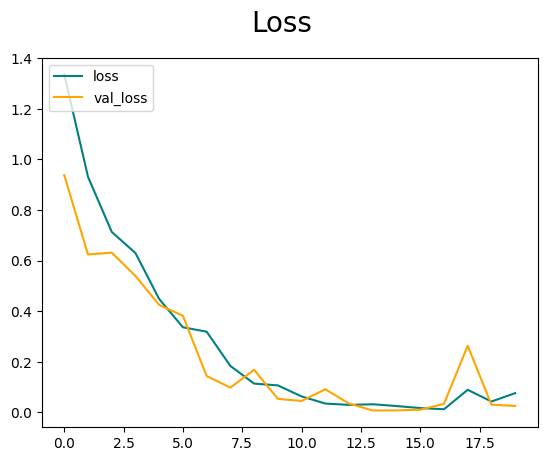

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

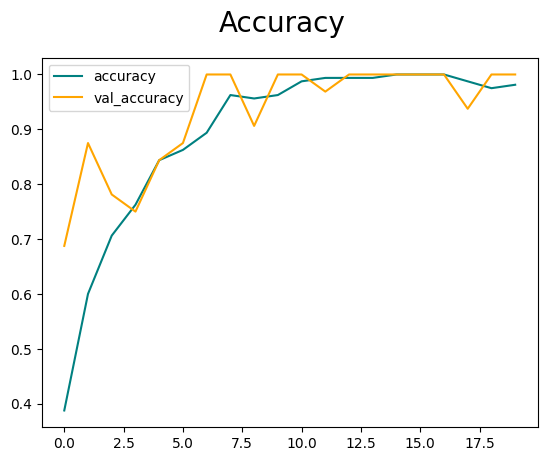

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

### Evaluation step

In [ ]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

print(pre.result().numpy(), re.result().numpy(), acc.result().numpy())


0.0 0.0 0.0


### Testing

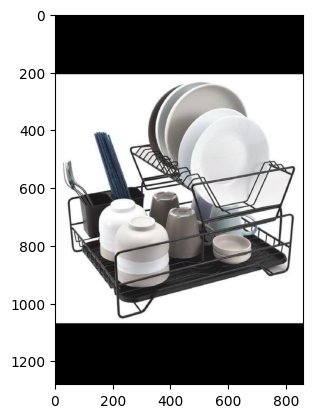

In [ ]:
import cv2
img = cv2.imread('/kaggle/input/datasettaskmariam/dataset/data/home/WhatsApp Image 2024-03-12 at 6.07.47 PM.jpeg')
plt.imshow(img)
plt.show()

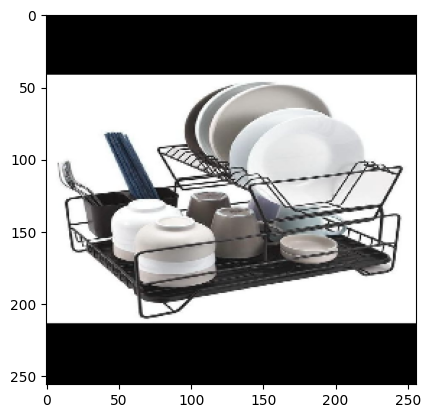

In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
# Assuming you have resized and preprocessed your image and stored it in the variable 'resize'

# Assuming 'model' is your trained model

# Predict probabilities for each class
yhat_probs = model.predict(np.expand_dims(resize/255, 0))

# Get the predicted class (index of the class with the highest probability)
predicted_class = np.argmax(yhat_probs)

# Print the predicted class
if predicted_class == 0:
    print(f'Predicted class is Class stationary')
elif predicted_class == 1:
    print(f'Predicted class is Class accessories')
elif predicted_class == 2:
    print(f'Predicted class is Class fashion')
elif predicted_class == 3:
    print(f'Predicted class is Class games')
elif predicted_class == 4:
    print(f'Predicted class is Class home')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class is Class home


### Saving the model  

In [ ]:

model.save(os.path.join('models','slash /Product Image Classifier'))

new_model = load_model('slash /Product Image Classifier')

new_model.predict(np.expand_dims(resize/255, 0))